# Business Understanding

I will be using Airbnb data for the city of Seattle with the interest of determining where to stay based on many criteria:

What are the most popular neighborhoods?

What are the most expensive neighborhoods?

How much would it cost for a couple per day to stay in Seattle Airbnb homes?
 
The Most Busy time in the year?

What are the most common type of Airbnb properties in Seattle?

Does the price influence the rating?

The most given "Rating" ?

What other factors affect flat prices?

# Data Understanding
 

Import required libraris

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math
%matplotlib inline


listing = pd.read_csv('listings.csv')
review = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')

In [4]:
print("listings dataset has %2d records and %2d columns" %(listing.shape[0],listing.shape[1]))
print("calendar dataset has %2d records and %2d columns" %(calendar.shape[0],calendar.shape[1]))
print("reviews dataset has %2d records and %2d columns" %(review.shape[0],review.shape[1]))

listings dataset has 3818 records and 92 columns
calendar dataset has 1393570 records and  4 columns
reviews dataset has 84849 records and  6 columns


Missing values


In [5]:
missing_data = listing.isna().mean().sort_values(ascending =False)*100            
print(len(missing_data[missing_data > 0]))
missing_data[missing_data > 0]

45


license                        100.000000
square_feet                     97.459403
monthly_price                   60.267156
security_deposit                51.126244
weekly_price                    47.380828
notes                           42.063908
neighborhood_overview           27.029859
cleaning_fee                    26.977475
transit                         24.463070
host_about                      22.498690
host_acceptance_rate            20.246202
review_scores_accuracy          17.234154
review_scores_checkin           17.234154
review_scores_value             17.181771
review_scores_location          17.155579
review_scores_cleanliness       17.103195
review_scores_communication     17.050812
review_scores_rating            16.946045
last_review                     16.422211
first_review                    16.422211
reviews_per_month               16.422211
space                           14.903091
host_response_rate              13.698271
host_response_time              13

In [6]:
#missing values
review.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [7]:
#missing values
calendar.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

A look at listing dataset

In [8]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [9]:
##list all the columns in the listings dataframe to find relevant data. Some plausible options are neighbourhood, 
#neighborhood_cleansed, name and price.
list(listing)


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [10]:
#get a first look at the listings data
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


A look at review dataset

In [11]:
list(review)

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

In [12]:
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [13]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


A look at calendar dataset

In [14]:
list(calendar)

['listing_id', 'date', 'available', 'price']

In [15]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [16]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [17]:
#number of bookings for each of the 3818 listings
calendar['listing_id'].value_counts().unique()

array([365], dtype=int64)

In [18]:
calendar['price'].describe().transpose() #most common price is 150$

count      934542
unique        669
top       $150.00
freq        36646
Name: price, dtype: object

Data Cleaning

In [19]:
def remove_dollar_from_price(df,var):
    '''
    Remove special characters from numerical data, e.g $ 
    
    Input - 
        df - dataframe
        var - column_name
        
    Output - extracted value
    '''
    if df.dtypes[var] == 'O':
        df[var] = df[var].str.extract('([0-9.]+)').astype('float64')
        print("Removed $ from the column", var)
    else:
        print("The {var} column is already cleaned.".format(var = var))

In [20]:
def format_removed_columns_msg(count, col_types, rows, cols):
    '''Format print message
    
    params:
    count - number of columns in the list
    col_types - type of data removed, e.g - id, url, etc.
    rows - number of rows in the updated listing dataframe
    cols - number of columns in the updated listing dataframe
    '''   
    print("Removed {count} {col_types} columns from listings data, Updated data has {rows} rows and {cols} columns".format(count =count, col_types =col_types, rows = rows, cols = cols))

In [21]:
remove_dollar_from_price(calendar,'price') #remove $ from price in calendar dataset
remove_dollar_from_price(listing,'price') #remove $ from price in listings dataset

Removed $ from the column price
Removed $ from the column price


In [22]:
calendar = calendar.dropna()

In [23]:
listing = listing.dropna(subset=['review_scores_value'])

In [24]:
listing['price'] = listing['price'].astype(float)

In [25]:
listing["review_scores_value"].isnull().mean()
listing = listing[~listing["review_scores_value"].isnull()]

Data Preparation

# Question1: What are the most popular neighborhoods? 

Broadway                     321
Belltown                     203
Wallingford                  145
Fremont                      134
Minor                        124
University District           95
Stevens                       94
First Hill                    90
Central Business District     89
Lower Queen Anne              73
Name: neighbourhood_cleansed, dtype: int64

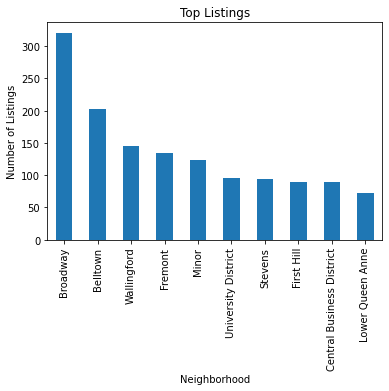

In [26]:
listings_per_neighborhood = listing['neighbourhood_cleansed'].value_counts()
listings_per_neighborhood[:10].plot(kind="bar", title="Top Listings", xlabel="Neighborhood", ylabel="Number of Listings")

listings_per_neighborhood.head(10)

# Question2: What are the most expensive neighborhoods? 

neighbourhood_cleansed
Southeast Magnolia     242.571429
Portage Bay            227.857143
Westlake               212.800000
West Queen Anne        190.654545
Industrial District    187.500000
Briarcliff             183.583333
Montlake               182.375000
Pioneer Square         174.000000
Fauntleroy             173.444444
Sunset Hill            170.933333
Name: price, dtype: float64

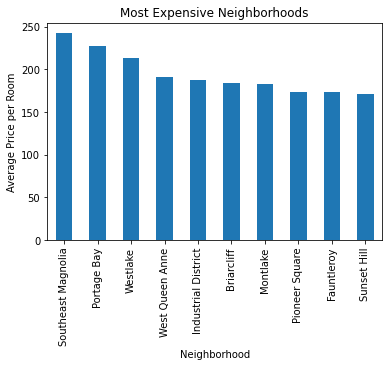

In [27]:

#Group the data by neighborhood then find the average price per room according to that grouping.
average_neighborhood_price = listing.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending=False)
average_neighborhood_price[:10].plot(kind="bar", title="Most Expensive Neighborhoods", xlabel="Neighborhood", ylabel="Average Price per Room")

average_neighborhood_price.head(10)

# Question3: How much would it cost for a couple per day to stay in Seattle Airbnb homes?


In [28]:
#Avergae price per day by guests_included
listing_guest_included = listing.groupby('accommodates')['price'].mean().reset_index()
listing_guest_included.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
accommodates,1.0,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.0,12.000000,14.000000,15.0,16.00
price,56.0,89.863368,112.393064,135.086207,178.652174,196.355634,206.952381,288.418367,413.636364,355.086957,975.0,345.666667,381.333333,172.0,439.75


One night-stay in Airbnb Seattle would cost close to 90 dollars for a single person and 112 dollars for a couple.

# Question4: The Most Busy time in the year?



In [29]:
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,1
10,241032,2016-01-14,t,85.0,1
14,241032,2016-01-18,t,85.0,1


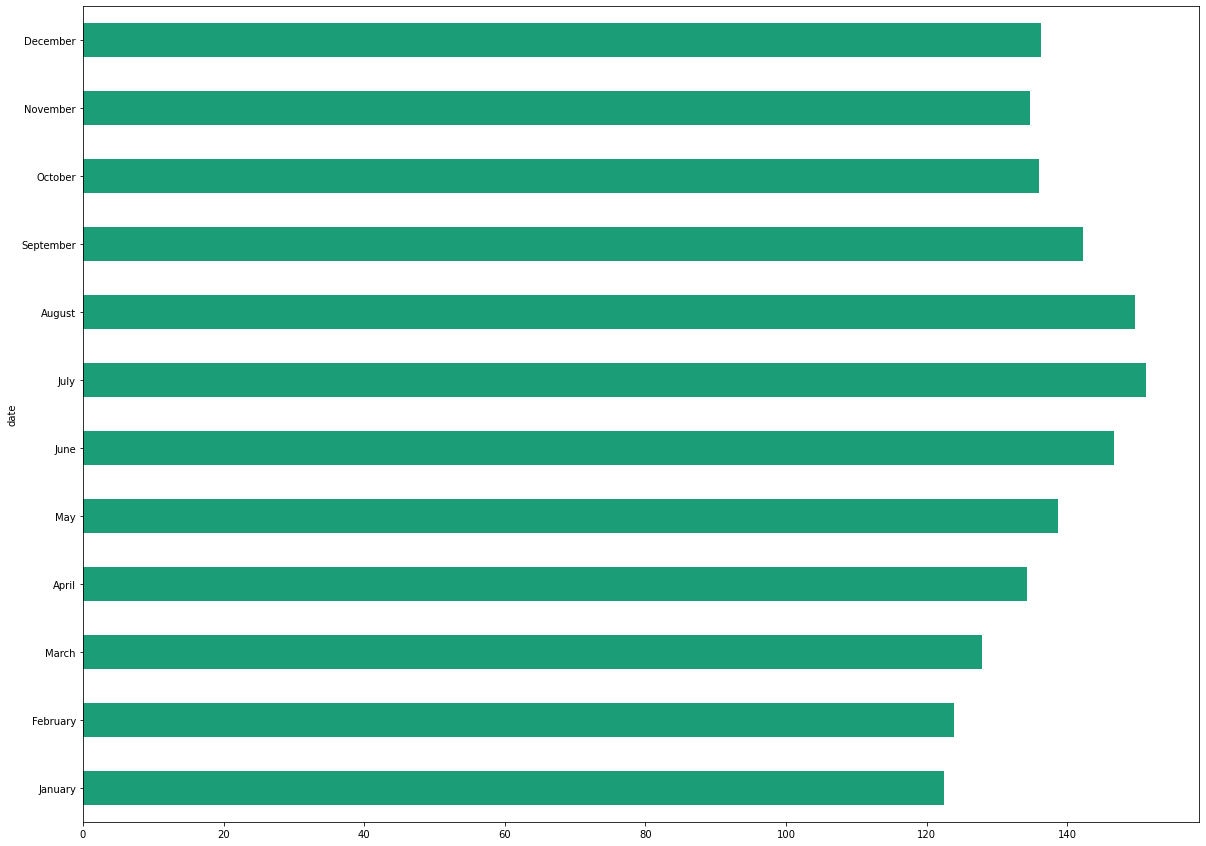

In [30]:
calendar['date'] = pd.to_datetime(calendar['date'])
price_date = calendar.groupby(calendar['date'].dt.strftime('%B'),sort=False)['price'].mean()
#visualize
price_date.plot(kind ='barh',figsize =(20,15), colormap="Dark2");

There is an upward trend in price from Feb'16 to July'16 where the average price rises to the highest which is $153 per day.
There is a downward trend till Nov'16.
The best time to visit Seattle is in Summers from June to August.
A little vertical line in Jan means that there are 2 average price for 2016 and 2017: The mean price in Jan'17 is higher than Jan'16.

# Question5: What are the most common type of Airbnb properties in Seattle?


In [31]:
listing['property_type'].value_counts()

House              1455
Apartment          1425
Townhouse            80
Condominium          68
Loft                 33
Bed & Breakfast      26
Cabin                21
Other                19
Camper/RV            10
Bungalow              9
Boat                  5
Tent                  4
Dorm                  2
Chalet                2
Treehouse             2
Yurt                  1
Name: property_type, dtype: int64

Text(0.5, 0, 'Property Type')

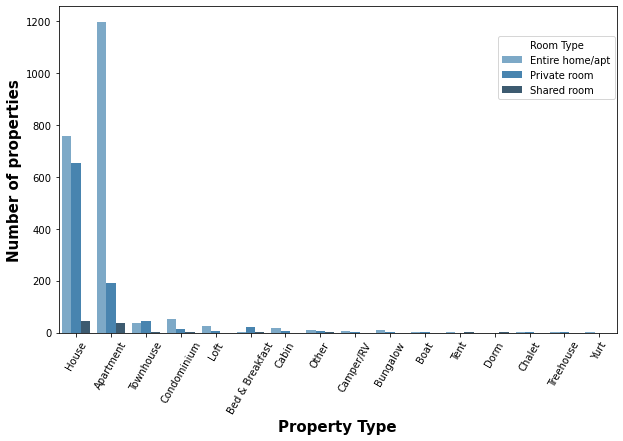

In [32]:
# plot a countplot of peoperties with hue as room_type
plt.figure(figsize=(10,6))
sns.countplot(x = 'property_type', data = listing,hue = 'room_type', palette= 'Blues_d',
             order=listing.property_type.value_counts().index)
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor = (1.05,1), loc =1, borderaxespad =3., title = 'Room Type', fontsize = 'medium')
plt.ylabel('Number of properties', fontsize = 15, weight = 'bold')
plt.xlabel('Property Type', fontsize = 15, weight = 'bold')


# Question6: Does the price influence the rating?

In [33]:
listing[['price','review_scores_value']].head(30)

,price,review_scores_value
0,85.0,10.0
1,150.0,10.0
2,975.0,10.0
4,450.0,9.0
5,120.0,10.0
6,80.0,10.0
7,60.0,10.0
8,90.0,10.0
9,150.0,9.0
10,95.0,10.0


Based on the above table we can say that the price does not affect the rating

# Question7:The most given "Rating" ?

In [34]:
fill = lambda x : 0 if str(x) == "nan" else int(x)
rating = listing["review_scores_value"].apply(fill).value_counts()
print(rating)

10    1775
9     1137
8      190
7       38
6       16
4        4
2        1
5        1
Name: review_scores_value, dtype: int64


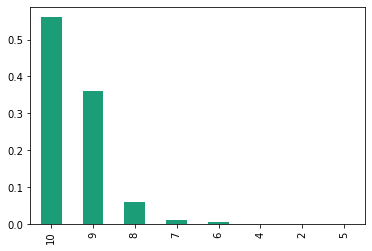

In [35]:
#visualize
rating_list = rating/listing.shape[0]
rating_list.plot(kind='bar', stacked=True ,colormap='Dark2');

# Question8: What other factors affect flat prices?

Data Cleaning for building the model

In [36]:
listing1 = pd.read_csv('listings.csv')

In [37]:
listing1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [38]:
'''Clean Data
    1. remove columns containing single value as they hold no significant information
    2. remove columns contining urls
    3. remove columns containing ids 
    4. remove textual columns as we are not doing text mining in this notebook '''
#check fr the single value for a categorical column
#df_listing_cat =listing1.select_dtypes(include=['object']).copy()
single_category = []
drop_url_col = []
drop_id_col= []
drop_text_column = []
for i in listing1.columns:
    if len(listing1[i].unique())==1:
        single_category.append(i)
    elif 'url' in i:
        drop_url_col.append(i)
    elif '_id' in i:
        drop_id_col.append(i)
    elif listing1[i].dtype == np.dtype('O') and len(listing1[i].unique())>20 and listing1[i].str.contains('.{40,}[^0-9a-zA-Z,]+[A-Za-z]+', regex = True).any():
            drop_text_column.append(i)
# remove columns containing single value as they hold no significant information 
listing1.drop(single_category, axis=1, inplace= True)
format_removed_columns_msg(len(single_category), "single value", listing1.shape[0], listing1.shape[1])

#remove columns contining urls
listing1.drop(drop_url_col, axis=1, inplace= True)
format_removed_columns_msg(len(drop_url_col), "url", listing1.shape[0],listing1.shape[1])

#remove columns containing ids 
listing1.drop(drop_id_col, axis=1, inplace= True)
format_removed_columns_msg(len(drop_id_col), "id", listing1.shape[0], listing1.shape[1])

#remove textual columns
listing1.drop(drop_text_column, axis=1, inplace= True)
format_removed_columns_msg(len(drop_text_column), "textual", listing1.shape[0], listing1.shape[1])

Removed 11 single value columns from listings data, Updated data has 3818 rows and 81 columns
Removed 8 url columns from listings data, Updated data has 3818 rows and 73 columns
Removed 2 id columns from listings data, Updated data has 3818 rows and 71 columns
Removed 11 textual columns from listings data, Updated data has 3818 rows and 60 columns


In [39]:
#Remove columns holding duplicate information and irrelevant columns
irrelevant_cols = ['first_review', 'last_review','name','host_name' ,'city','state','zipcode','smart_location',
                   'calendar_updated','reviews_per_month','require_guest_phone_verification','require_guest_profile_picture',
                   'host_acceptance_rate','host_has_profile_pic','host_total_listings_count','calculated_host_listings_count',
                   'neighbourhood_cleansed','host_neighbourhood',
                   'neighbourhood','host_response_time']

listing1.drop(irrelevant_cols, axis=1, inplace= True)

format_removed_columns_msg(len(irrelevant_cols), "irrelevant/duplicate", listing1.shape[0], listing1.shape[1])

Removed 20 irrelevant/duplicate columns from listings data, Updated data has 3818 rows and 40 columns


In [40]:
#drop the columns containing more than 40% missing values
drop_missing_values_col = list(set(listing1.columns[listing1.isna().mean() >.40]))
listing1.drop(drop_missing_values_col, axis=1, inplace= True)

print(listing1.shape)

format_removed_columns_msg(len(drop_missing_values_col), "", listing1.shape[0], listing1.shape[1])

(3818, 36)
Removed 4  columns from listings data, Updated data has 3818 rows and 36 columns


In [41]:
listing1.columns

Index(['id', 'host_since', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [42]:
#merge listings data with calendar data
listing1 = listing1.rename(index=str, columns={"id": "listing_id"})
listing1 =listing1.drop('price', axis =1)
df = pd.merge(calendar, listing1, on = 'listing_id')
print(df.shape)

#convert date from the calendar into month and drop the date colum

df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year
df = df.drop(columns = ['date'])

#remove rows where price == nan, because price will be used as target column
df = df.dropna(subset=['price'])

#remove_dollar_from_price(df,'price')
df = df.drop(columns = ['available'])
print(df.shape)
#Satte has a two same values - case sensitive, we can remove this col as well

(934542, 39)
(934542, 38)


In [43]:
# convert true or false value to 1 or 0
df['host_is_superhost'].fillna('f', inplace = True)
dummy_cols = ['instant_bookable', 
              'is_location_exact',
              'host_is_superhost']

for col in dummy_cols:
    df[col] = df[col].map(lambda x: 1 if x == 't' else 0)

#remove null values from property type as there are only 0.03 % null values
df['property_type'].dropna(inplace = True)
df =df.reset_index()

In [44]:
def get_host_since_year(row):
    ''' Get year from a date represented as a string '''
    try:
        host_since = pd.to_numeric(row['host_since'].split('-')[0])
    except:
        host_since = np.nan
    return host_since

#convert host_since date into number and fill in missing values, drop the original column
df['host_since_year'] = df.apply(lambda x: get_host_since_year(x),axis=1)
df['host_since_year'].fillna(df['host_since_year'].mean(), inplace = True)
df = df.drop(columns = ['host_since'])

#convert host_response_rate into number and fill in missing values
df['host_response_rate'] = df['host_response_rate'].astype(str)
df['host_response_rate'] = df['host_response_rate'].str.replace("%", "").astype("float")
df['host_response_rate'].fillna(df['host_response_rate'].mean(), inplace = True)

#fill missing values with mean value for host_listings_count
df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)

#fill in missing values for bathrooms, bedrooms and beds with mode
mode_col = ['bathrooms','bedrooms','beds']
for col in mode_col:
    df[col] = df[col].fillna(df[col].mode()[0])

#Remove $,% from numerical columns and fill null values
remove_dollar_from_price(df,'cleaning_fee')
remove_dollar_from_price(df,'extra_people')

#fill in missing values of rest of the numerical columnd with mean()
df_numeric =df.select_dtypes(include=['int64','float'])
for col in df_numeric.columns:
    df[col].fillna(df[col].mean(),inplace = True)

#split categorical columns to dummy columns and remove the original ones
categorical_cols =df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
    dummies = pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)
    df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
print(df.shape)

Removed $ from the column cleaning_fee
Removed $ from the column extra_people
(934542, 73)


## Plot a heat map of the pairwise correlation of numeric features including the target(price).

The easiest way to find out if there is any relationship between features and target for doing feature selection is to get the correlation measure for every feature in the dataset.



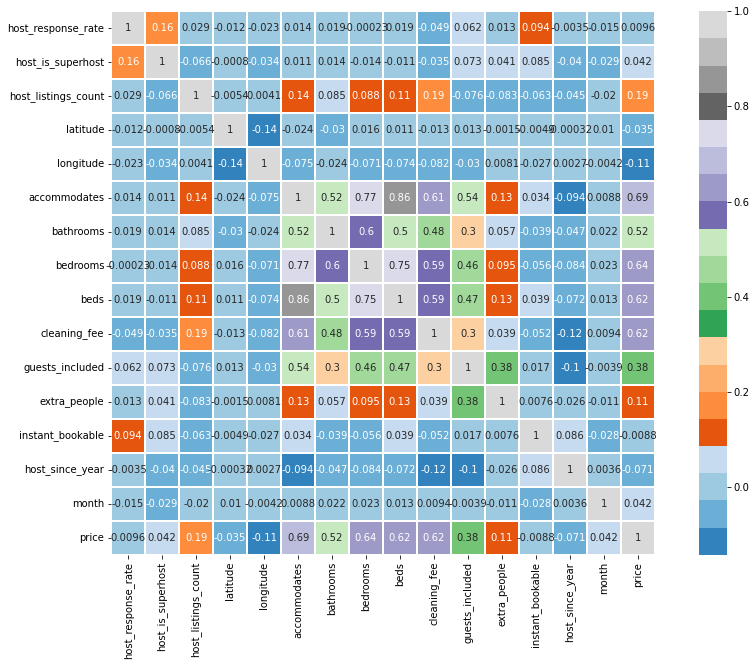

In [45]:
plt.figure(figsize=(16,10))
df_num = [ 'host_response_rate','host_is_superhost',
       'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       'guests_included', 'extra_people', 'instant_bookable',
       'host_since_year','month', 'price']

sns.heatmap(df[df_num].corr(), cbar= True, annot= True,square= True,linewidths=0.3, cmap= 'tab20c')
plt.savefig('heatmap.png')

The numerical features - accommodates, bedrooms, beds, cleaning fee are highly positively correlated to the price whereas host_since_year is negatively correlated.



In [46]:
df[df_num].corr()['price'].sort_values()

longitude             -0.111908
host_since_year       -0.071049
latitude              -0.034871
instant_bookable      -0.008794
host_response_rate     0.009569
month                  0.041545
host_is_superhost      0.042268
extra_people           0.107092
host_listings_count    0.187818
guests_included        0.383615
bathrooms              0.524275
beds                   0.617077
cleaning_fee           0.623144
bedrooms               0.636860
accommodates           0.685759
price                  1.000000
Name: price, dtype: float64

Text(0.5, -72.0, 'Numerical Features')

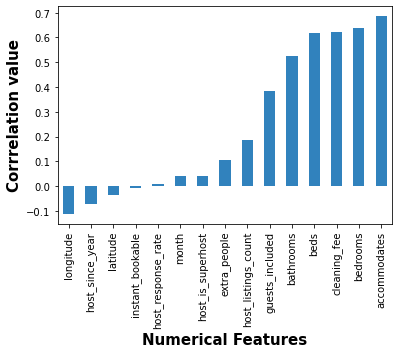

In [47]:
#plot the correlation values of the target(price) variable:
df[df_num].corr()['price'][:-1].sort_values().plot(kind='bar', colormap = 'tab20c')
plt.savefig('heatmap_plot.png')
plt.ylabel('Corrrelation value', fontsize = 15, weight = 'bold')
plt.xlabel('Numerical Features', fontsize = 15, weight = 'bold')

# Conclusion:

In this analysis we tried to understand the factors affecting the booking prices with the help of Airbnb Seattle data. The above approach can be used to analyze Airbnb data for other cities as well.

*Based on the number of listings in a given neighborhood, the top five most popular neighborhoods are Broadway, Belltown, Wallingford, Fremont, and Minor.

*The top five most expensive neighborhoods are Southeast Magnolia, Portage Bay, Westlake, West Queen Anne, and Industrial District.

*One night-stay in Airbnb Seattle would cost close to 91 dollars for a single person and 112 dollars for a couple.

*Summertime is busiest so the highest price during this season.

*Houses  and apartments occupy 90% of all Airbnb properties in Seattle with 1,733 houses followed by 1,708 apartments. Yurt, Dorm, and Chalet are available for Nell in Seattle.

*The price does not affect the rating.

*People tend to give a more high rating.

*Basic configuration of the properties (number of bedrooms, bathrooms, beds and accomodates) affect the booking price.
